In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [162]:
df=pd.read_csv("./ml_datasource_prepare.csv")

In [164]:
df.head()

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
2,151.0,260,22.4,1,1,0,0.93,0
6,87.0,251,0.2,1,1,0,0.88,0
20,127.0,228,8.6,1,1,0,1.72,0
24,71.0,221,2.2,1,1,0,2.38,0
26,123.0,220,4.5,1,1,0,2.20,0


In [166]:
df_inputs=df.drop('purchased',axis=1)
df_target=df['purchased']

In [168]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_inputs,df_target,test_size=0.2)

## using statsmodels

In [171]:
import statsmodels.api as sm
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
log_reg=sm.GLM(y_train,x_train,family=sm.families.Binomial())
log_reg_results = log_reg.fit()  # Fit the model
print(log_reg_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              purchased   No. Observations:                12728
Model:                            GLM   Df Residuals:                    12721
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1628.6
Date:                Fri, 01 Nov 2024   Deviance:                       3257.2
Time:                        22:43:00   Pearson chi2:                 3.75e+06
No. Iterations:                    10   Pseudo R-squ. (CS):             0.2794
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1

In [172]:
predictions_prob = log_reg_results.predict(x_test) 

In [175]:
predictions_prob

2430     6.540952e-09
11927    5.787624e-01
13332    4.042617e-02
10241    8.691700e-05
4288     6.539139e-08
             ...     
4735     1.817175e-07
15811    1.643207e-01
7022     1.078078e-05
12384    3.112091e-03
14015    2.431539e-02
Length: 3182, dtype: float64

In [176]:
predictions_class = np.where(predictions_prob >= 0.5, 1, 0)


In [179]:
predictions_class

array([0, 1, 0, ..., 0, 0, 0])

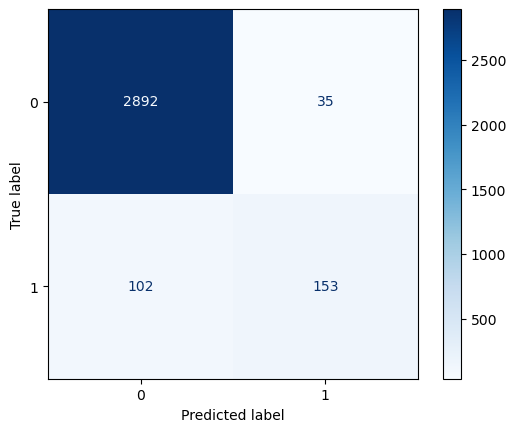

In [180]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')

In [182]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_predect)
print("R-squared using probabilities:", r2)

R-squared using probabilities: -0.7180757919840293


# using LogisticRegression from sklearn

In [184]:
x_train,x_test,y_train,y_test=train_test_split(df_inputs,df_target,test_size=0.2)

In [185]:
from sklearn.linear_model import LogisticRegression
LogisticRegression = LogisticRegression()
LogisticRegression.fit(x_train,y_train)
y_predect=LogisticRegression.predict(x_test)

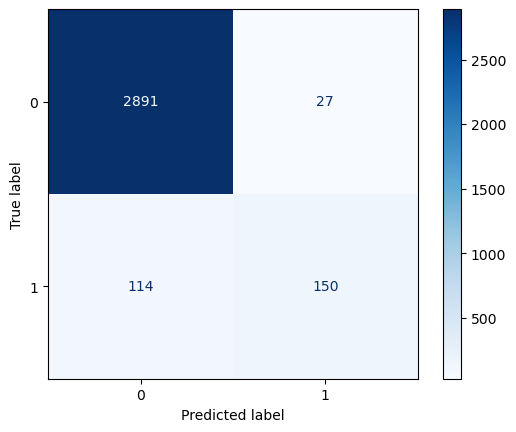

In [186]:
cm = confusion_matrix(y_test, y_predect)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')

In [187]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_predect)
print("R-squared using probabilities:", r2)

R-squared using probabilities: 0.41758832326001627
